In [3]:
import py3dep
from pynhd import NLDI, NHDPlusHR, WaterData
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
import dataretrieval.nwis as nwis

In [40]:
gfv11_filepath = Path('../../Gfv1.1')
print (f'gfv1.1 path exists?: {gfv11_filepath.exists()}')
poi = gpd.read_file(gfv11_filepath / 'POIs_v1_1.gpkg')
seg = gpd.read_file(gfv11_filepath / 'nsegment_v1_1.gpkg')

gfv1.1 path exists?: True


C:\Users\rmcd\Miniconda3\envs\nldi_el_serv\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [41]:
type(poi.NHDPlusID.values)

numpy.ndarray

In [42]:
poi.NHDPlusID = poi.NHDPlusID.astype('int64')

In [43]:
poi.NHDPlusID

0         5000100002857
1         5000100004284
2         5000100012160
3         5000100000689
4         5000100002063
              ...      
58186          22226812
58187    10000900096921
58188    55000800119873
58189    55000800050349
58190    55000800241941
Name: NHDPlusID, Length: 58191, dtype: int64

In [19]:
gage_id = '06759500'
flw_main = NLDI().navigate_byid(fsource="nwissite",
                             fid=f"USGS-{gage_id}",
                             navigation="upstreamMain",
                             source="flowlines",
                             distance=5000)

st_all = NLDI().navigate_byid(fsource="nwissite",
                             fid=f"USGS-{gage_id}",
                             navigation="upstreamMain",
                             source="nwissite",
                             distance=5000)

In [20]:
st_all

,geometry,source,sourceName,identifier,name,uri,comid,reachcode,measure,navigation
0,POINT (-104.91109 39.87443),nwissite,NWIS Sites,USGS-395228104543801,SITE-6,https://waterdata.usgs.gov/monitoring-location...,229603,10190003000044,75.0455625794,https://labs.waterdata.usgs.gov/api/nldi/linke...
1,POINT (-104.86831 39.92165),nwissite,NWIS Sites,USGS-395518104520401,HENDERSON-1A,https://waterdata.usgs.gov/monitoring-location...,229493,10190003000044,14.7527178722,https://labs.waterdata.usgs.gov/api/nldi/linke...
2,POINT (-104.48634 40.37581),nwissite,NWIS Sites,USGS-402233104290901,MONFORT FEEDLOT NE SUMP NEAR GREELEY CO,https://waterdata.usgs.gov/monitoring-location...,226821,10190003001127,57.0665396856,https://labs.waterdata.usgs.gov/api/nldi/linke...
3,POINT (-105.00026 39.71138),nwissite,NWIS Sites,USGS-394241104595900,SP-1000 SOUTH PLATTE RIVER BL ALAMEDA AVE,https://waterdata.usgs.gov/monitoring-location...,189345,10190002000004,83.7280081489,https://labs.waterdata.usgs.gov/api/nldi/linke...
4,POINT (-104.41468 40.34943),nwissite,NWIS Sites,USGS-402058104245100,"SOUTH PLATTE RIVER AT HARDIN, CO",https://waterdata.usgs.gov/monitoring-location...,226585,10190003000031,49.4901939024,https://labs.waterdata.usgs.gov/api/nldi/linke...
...,...,...,...,...,...,...,...,...,...,...
94,POINT (-105.01776 39.73721),nwissite,NWIS Sites,USGS-394414105010200,TR-1140 ZUNI ST PWR PLANT #2 (E BANK TROUGH),https://waterdata.usgs.gov/monitoring-location...,188067,10190002000003,22.9930055490,https://labs.waterdata.usgs.gov/api/nldi/linke...
95,POINT (-105.00193 39.65971),nwissite,NWIS Sites,USGS-393935105000500,TR-320 LITTLE DRY CREEK AT MOUTH,https://waterdata.usgs.gov/monitoring-location...,194423,10190002000843,94.8193808716,https://labs.waterdata.usgs.gov/api/nldi/linke...
96,POINT (-105.16999 39.40916),nwissite,NWIS Sites,USGS-06707500,"SOUTH PLATTE RIVER AT SOUTH PLATTE, CO",https://waterdata.usgs.gov/monitoring-location...,190357,10190002000079,96.5592600000,https://labs.waterdata.usgs.gov/api/nldi/linke...
97,POINT (-105.06665 39.55054),nwissite,NWIS Sites,USGS-393302105035801,CHATFIELK LK MAIN BODY,https://waterdata.usgs.gov/monitoring-location...,188749,10190002015707,45.3628293520,https://labs.waterdata.usgs.gov/api/nldi/linke...


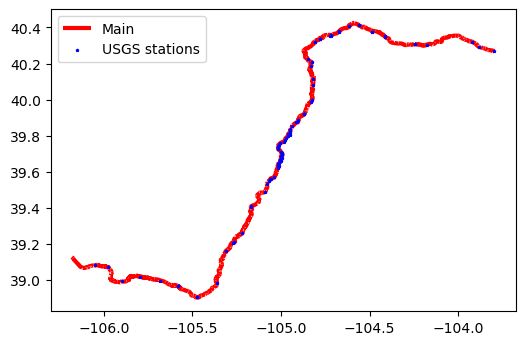

In [26]:
ax = flw_main.plot(
    lw=3, color="r", zorder=2, label="Main"
)
st_all.plot(
    ax = ax, label="USGS stations", marker="*", markersize=3, zorder=4, color="b"
)
ax.legend(loc="best")
ax.set_aspect("auto")
ax.figure.set_dpi(100)

In [29]:
st_all.comid.values

array(['229603', '229493', '226821', '189345', '226585', '229645',
       '188657', '189915', '189345', '226643', '188763', '188209',
       '188209', '227923', '189919', '226575', '226571', '5239006',
       '194423', '225531', '191237', '188619', '226571', '226585',
       '188657', '189915', '189919', '188067', '229757', '229493',
       '229669', '188811', '190871', '190747', '190643', '5239910',
       '225489', '5241238', '189915', '229493', '5241238', '225531',
       '191355', '226615', '5240180', '229615', '188067', '229493',
       '226821', '188619', '5241890', '5240492', '226615', '5242120',
       '5241136', '229709', '229603', '3561878', '5241238', '189915',
       '226669', '229351', '190407', '5241420', '188305', '229757',
       '225621', '226665', '225955', '226833', '189353', '229709',
       '188209', '229639', '189919', '226565', '229757', '188097',
       '188209', '194423', '188067', '228593', '188209', '194423',
       '194423', '227969', '226565', '229561', '22

In [39]:
len(poi.loc[poi.NHDPlusID.isin(['229493'])])


0

In [45]:
gf_poi = poi[poi.NHDPlusID.isin(st_all.comid.values.astype('int64'))]

In [46]:
gf_poi

,OBJECTID,GNIS_Name,NHDPlusID,HydroSeq,Type_conf,Type_WBOut,Type_WBIn,Type_Gage,Type_Ref,Type_Con,Type_GFv1,Type_Travel,Type_Elev,Gage_Source,Type_NCA,seg_id_nhm,poi_segment_v1_1,NHD_Unit,geometry
28468,28469,South Platte River,226833,920600001.0,1,0,0,0,0,0,0,0,0,0,0,24271,24271,10L,POINT Z (-736505.769 1960641.738 0.000)
29355,29356,South Platte River,226571,920200001.0,1,0,0,0,0,0,0,0,0,0,0,24261,24261,10L,POINT Z (-722489.246 1966921.992 0.000)
29427,29428,South Platte River,188619,921900004.0,1,0,0,0,0,0,0,0,0,0,0,24188,24188,10L,POINT Z (-763750.321 1895729.353 0.000)
29601,29602,South Platte River,5242120,922700175.0,0,1,0,0,0,0,0,0,0,0,0,25281,25281,10L,POINT Z (-812804.256 1804769.355 0.000)
30220,30221,South Platte River,188305,921900228.0,0,0,0,0,0,0,0,0,0,0,0,24185,24185,10L,POINT Z (-766743.384 1878371.993 0.000)
30237,30238,South Platte River,188749,921900409.0,1,0,0,0,0,0,0,0,0,0,0,24194,24194,10L,POINT Z (-770493.501 1874067.752 0.000)
30791,30792,South Fork South Platte River,5240492,922700450.0,1,0,0,0,0,0,0,0,0,0,0,25276,25276,10L,POINT Z (-834136.038 1818908.420 0.000)
30935,30936,South Platte River,229645,921400001.0,0,0,0,0,0,1,0,0,0,0,0,24281,24281,10L,POINT Z (-757971.663 1903385.333 0.000)
32115,32116,South Platte River,188209,921900187.0,1,0,0,0,0,0,0,0,0,0,0,24182,24182,10L,POINT Z (-765315.029 1884034.390 0.000)
32236,32237,South Platte River,5241238,922700234.0,0,0,1,06695000,Non-ref,0,0,0,0,V1 Type_GagesII field,0,25277,25277,10L,POINT Z (-819864.778 1810634.036 0.000)
